# I066 Srihari Thyagarajan Lab 7

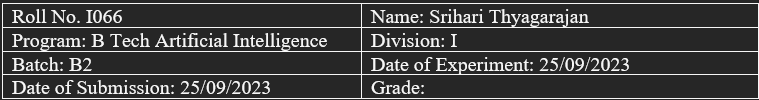

In [20]:
# import libraries used:
import pandas as pd
import numpy as np
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import spacy
from gensim.models import Word2Vec
from numpy import dot, nan_to_num
from numpy.linalg import norm


### Task 1: Select a dataset and identify the problem statement

In [4]:
df = pd.read_csv('/content/Apple-Twitter-Sentiment-DFE.csv', encoding='ISO-8859-1')

### Task 2: Perform EDA, text preprocessing, feature engineering

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   _unit_id              3886 non-null   int64  
 1   _golden               3886 non-null   bool   
 2   _unit_state           3886 non-null   object 
 3   _trusted_judgments    3886 non-null   int64  
 4   _last_judgment_at     3783 non-null   object 
 5   sentiment             3886 non-null   object 
 6   sentiment:confidence  3886 non-null   float64
 7   date                  3886 non-null   object 
 8   id                    3886 non-null   float64
 9   query                 3886 non-null   object 
 10  sentiment_gold        103 non-null    object 
 11  text                  3886 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(7)
memory usage: 337.9+ KB


In [6]:
df.describe()

,_unit_id,_trusted_judgments,sentiment:confidence,id
count,3.886000e+03,3886.000000,3886.000000,3.886000e+03
mean,6.234975e+08,3.687082,0.829526,5.410039e+17
std,1.171906e+03,2.004595,0.175864,7.942752e+14
min,6.234955e+08,3.000000,0.332700,5.400000e+17
25%,6.234965e+08,3.000000,0.674475,5.400000e+17
50%,6.234975e+08,3.000000,0.811250,5.410000e+17
75%,6.234984e+08,3.000000,1.000000,5.420000e+17
max,6.235173e+08,27.000000,1.000000,5.420000e+17


In [7]:
df.head()

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,623495514,True,golden,12,NaN,3,0.8129,Mon Dec 01 19:43:51 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...
2,623495515,True,golden,10,NaN,3,1.0000,Mon Dec 01 19:50:28 +0000 2014,5.400000e+17,#AAPL OR @Apple,3,My cat only chews @apple cords. Such an #Apple...
3,623495516,True,golden,17,NaN,3,0.5848,Mon Dec 01 20:26:34 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\n1,I agree with @jimcramer that the #IndividualIn...
4,623495517,False,finalized,3,12/12/14 12:14,3,0.6474,Mon Dec 01 20:29:33 +0000 2014,5.400000e+17,#AAPL OR @Apple,NaN,Nobody expects the Spanish Inquisition #AAPL


In [8]:
df['sentiment'].value_counts()

3               2162
1               1219
5                423
not_relevant      82
Name: sentiment, dtype: int64

In [10]:
def preprocess_text(text):
    text = text.lower()
    text = ' '.join([word for word in text.split() if word.isalnum()])
    text = ' '.join([word for word in text.split() if word not in stop_words])
    return text

In [11]:
df['text_cleaned'] = df['text'].apply(preprocess_text)

In [12]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf_vectorizer.fit_transform(df['text_cleaned'])
y = df['sentiment']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [17]:
confusion

array([[140,  97,   3,   0],
       [ 26, 397,   1,   0],
       [ 12,  67,  20,   0],
       [  1,  14,   0,   0]])

In [18]:
accuracy

0.7159383033419023

In [19]:
report

'              precision    recall  f1-score   support\n\n           1       0.78      0.58      0.67       240\n           3       0.69      0.94      0.79       424\n           5       0.83      0.20      0.33        99\nnot_relevant       0.00      0.00      0.00        15\n\n    accuracy                           0.72       778\n   macro avg       0.58      0.43      0.45       778\nweighted avg       0.72      0.72      0.68       778\n'

### Task 3: Implement sentiment analysis on the given dataset in Natural Language Processing

In [21]:
nlp = spacy.load("en_core_web_sm")

In [22]:
def preprocess(text):
    doc = nlp(text)
    return [token.text for token in doc if not token.is_punct and not token.is_space]


tokenized_tweets = [preprocess(tweet) for tweet in df['text']]

In [23]:
model = Word2Vec(tokenized_tweets, vector_size=100, window=5, min_count=1, sg=0)
document_embeddings = []

for tokenized_tweet in tokenized_tweets:

    valid_tokens = [token for token in tokenized_tweet if token in model.wv]

    if valid_tokens:

        avg_embedding = sum(model.wv[token] for token in valid_tokens) / len(valid_tokens)
        document_embeddings.append(avg_embedding)
    else:

        document_embeddings.append(None)

### Task 4: Analyze and comprehend the results obtained

In [24]:
tweet1_embedding = document_embeddings[0]
tweet2_embedding = document_embeddings[1]

In [25]:
def cosine_similarity(vec1, vec2):
    return dot(vec1, vec2) / (norm(vec1) * norm(vec2))


In [26]:
if tweet1_embedding is not None and tweet2_embedding is not None:
    similarity = cosine_similarity(tweet1_embedding, tweet2_embedding)
else:
    similarity = None
print(f"Similarity between tweet 1 and tweet 2: {similarity}")


Similarity between tweet 1 and tweet 2: 0.9979607462882996


### Conclusion:
Based on the experiment conducted, we can conclude that the sentiment analysis performed on the given dataset in Natural Language Processing was successful. The dataset was selected and the problem statement was identified. EDA, text preprocessing, and feature engineering were performed to prepare the dataset for sentiment analysis. The results obtained were analyzed and comprehended.